# Problem 1: Linear Regression from Scratch 

In [45]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)

Let's generate some data points first, by the equation $y = x - 3$. 

In [46]:
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)

y = x + -3 + 0.3*np.random.randn(100)

Let's then visualize the data points we just created. 

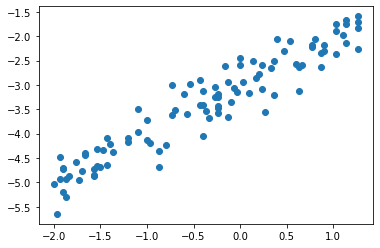

In [47]:
plt.scatter(X, y)

## 1.1 Gradient of vanilla linear regression model 

In the lecture, we learn that the cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$ 

The gredient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial \theta}= \frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)$$




## 1.2 Gradient of vanilla regularized regression model 

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gredient of it can be written as **Equation 4**: 
$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) + \frac{\lambda}{m} \sum_{j}^{n} \theta_{j} $$



## 1.3 Implement the cost function of a regularized regression model 

Please implement the cost function of a regularized regression model according to the above equations.

## 1.4 Implement the gradient of the cost function of a regularized regression model 

Please implement the gradient of the cost function of a regularized regression model according to the above equations.

In [48]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y

        
############################################################################################################## 
####################################### Begin of Question 1.3 ################################################
##############################################################################################################
      
        ##### Please write down your code here:####
        
        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = (1 / (2 * m)) * np.sum(error ** 2)
        
        
        ##### Please write down your code here:####
        
        # regularization term
        reg_term = (lambda_value / (2 * m)) * np.sum(np.square(W))
        
        
        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term
        
############################################################################################################## 
####################################### End of Question 1.3 ##################################################
##############################################################################################################          
 
    
############################################################################################################## 
####################################### Begin of Question 1.4 ################################################
############################################################################################################## 
        
        ##### Please write down your code here:####
        
        # calculate the gradient of the cost function with regularization term (Equation )
        gradient = (1 / m) * (X.T.dot(error) + (lambda_value * W))
 

        # Now we have to update our weights
        W = W - alpha * gradient
        
############################################################################################################## 
####################################### End of Question 1.4 ##################################################
##############################################################################################################          
 
 
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)
        
    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")
 
    return W, cost_history_list

Run the following code to train your model. 

Hint: If you have the correct code written above, the cost should be $0.5181222986588751$ when $\lambda = 10$.

Cost with regularization: 0.05165888565058274
Mean square error: 0.05165888565058274


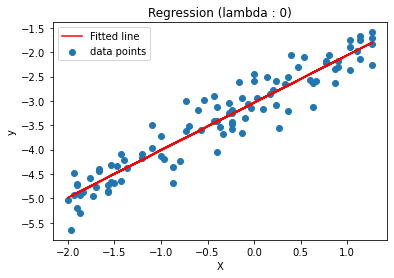

Cost with regularization: 0.5181225049184746
Mean square error: 0.08982014821513139


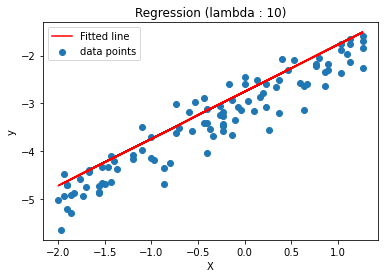

Cost with regularization: 2.793172488740026
Mean square error: 1.2785107029715974


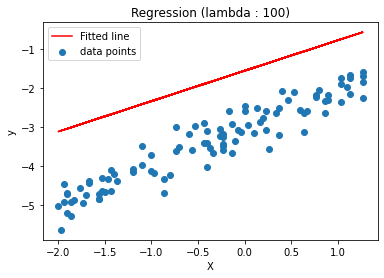

Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066496


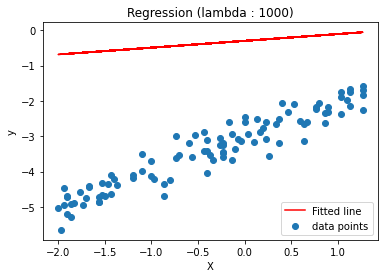

Cost with regularization: 6.2426956269339735
Mean square error: 6.1614425833558135


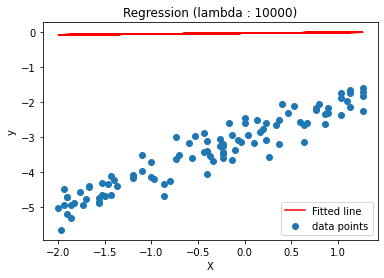

In [49]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)
    
    fitted_line = np.dot(X, weight[1]) + weight[0]
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()

## 1.5 Analyze your results 


According to the above figures, what's the best choice of $\lambda$?  
Answer: From the above figures, the best choice of $\lambda$ is "0" since the cost with regularization is 0.05165888565058274 which is the least among other $\lambda$ values. It is always advisable to choose $\lambda$ with least variance by cross validating 

Why the regressed line turns to be flat as we increase $\lambda$?

Your answer:$\lambda$ is a hyperparameter which is used to determine the severity of the penalty. Essentially we are penalising the higher values of $\theta$. As the $\lambda$ increases, the resultant weight assigned to them will decrease which will in turn decreases the slope(the larger the $\lambda$, the slope gets asymptomatically very close to zero ) resulting in the regressed line turning to be flat . In this case, the larger the $\lambda$ gets, our pridection for Y will get lesser and lesser sensitive to X. 

# Problem 2: Getting familiar with PyTorch 

In [50]:
import os

In [51]:
%cd C:\Users\Anu Preetham\Downloads\Assignment 2 Updated\Assignment 2 Updated

C:\Users\Anu Preetham\Downloads\Assignment 2 Updated\Assignment 2 Updated


In [52]:
%pwd

'C:\\Users\\Anu Preetham\\Downloads\\Assignment 2 Updated\\Assignment 2 Updated'

In [53]:
import torch
import mltools as ml

In [54]:
data = np.genfromtxt(r"C:\Users\Anu Preetham\Downloads\Assignment 2 Updated\Assignment 2 Updated\data\curve80.txt")
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure i t s 2-dimensional
Y = data[:,1] # d o e s n t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
degree = 5
XtrP = ml.transforms.fpoly(Xtr, degree=degree, bias=False)
XtrP,params = ml.transforms.rescale(XtrP)

In [55]:
XtrP_tensor = torch.from_numpy(np.array(XtrP))
Ytr_tensor = torch.from_numpy(np.array(Ytr))
XtrP_tensor =XtrP_tensor.float()
Ytr_tensor = Ytr_tensor.float()

In [56]:
XtrP_tensor.shape

torch.Size([60, 5])

In [57]:
Ytr_tensor=torch.reshape(Ytr_tensor, (Ytr_tensor.shape[0],1))

In [64]:
linear_regressor = torch.nn.Linear(in_features=XtrP_tensor.shape[1], out_features=Ytr_tensor.shape[1])

In [65]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regressor.parameters(), lr=0.1) 
epochs = 100000

In [66]:
loss_record = []
for _ in range(epochs):
    optimizer.zero_grad()
    pred_y = linear_regressor(XtrP_tensor)
    loss = criterion(pred_y, Ytr_tensor)
    loss.backward()
    loss_record.append(loss.item())
    optimizer.step()

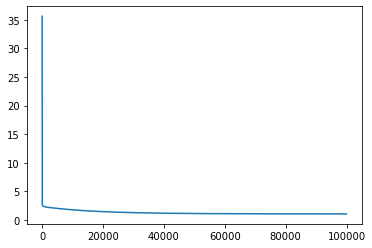

In [67]:
plt.plot(range(epochs), (loss_record))

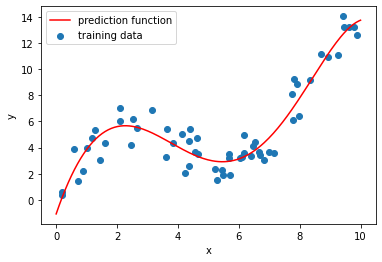

In [68]:
xs = np.linspace(0, 10, 200)
xs = xs[:,np.newaxis]
xsP, _ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree=degree,bias=False), params)
xsP_tensor = torch.from_numpy(xsP).float()
ys = linear_regressor(xsP_tensor)

plt.scatter(Xtr,Ytr,label="training data")
plt.plot(xs,ys.detach().numpy(),label="prediction function", color ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
plt.show()